# Identifying Risk Factors for Cardiovascular Deseases

We will analyse [this dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) and use K-nearest neighbours method in order to predict heart desease.

## Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As per the source, each patient has the following information collected about them:

* Age: age of the patient (years)
* Sex: sex of the patient (M: Male, F: Female)
* ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
* RestingBP: resting blood pressure (mm Hg)
* Cholesterol: serum cholesterol (mm/dl)
* FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
* RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
* ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
* Oldpeak: oldpeak = ST (Numeric value measured in depression)
* ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
* HeartDisease: output class (1: heart disease, 0: Normal)

In [2]:
hd = pd.read_csv('heart_disease_prediction.csv')
print(hd.head())
print(hd.info())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

7 features in total are numerical while 5 are categorical. However, two of the numerical features, FastingBS and HeartDisease are categorical as well.

In [3]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* There are no missing values.
* The average age of pacients is 53 years.
* Min value for RestingBP and Choresterol is 0: it seams that when data is absent it was recorded as 0.

In [4]:
hd.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Let´s confirm that FastingBS and HeartDisease is categorical too:

In [5]:
hd["FastingBS"].unique(), hd["HeartDisease"].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

## Análisis of categorical columns

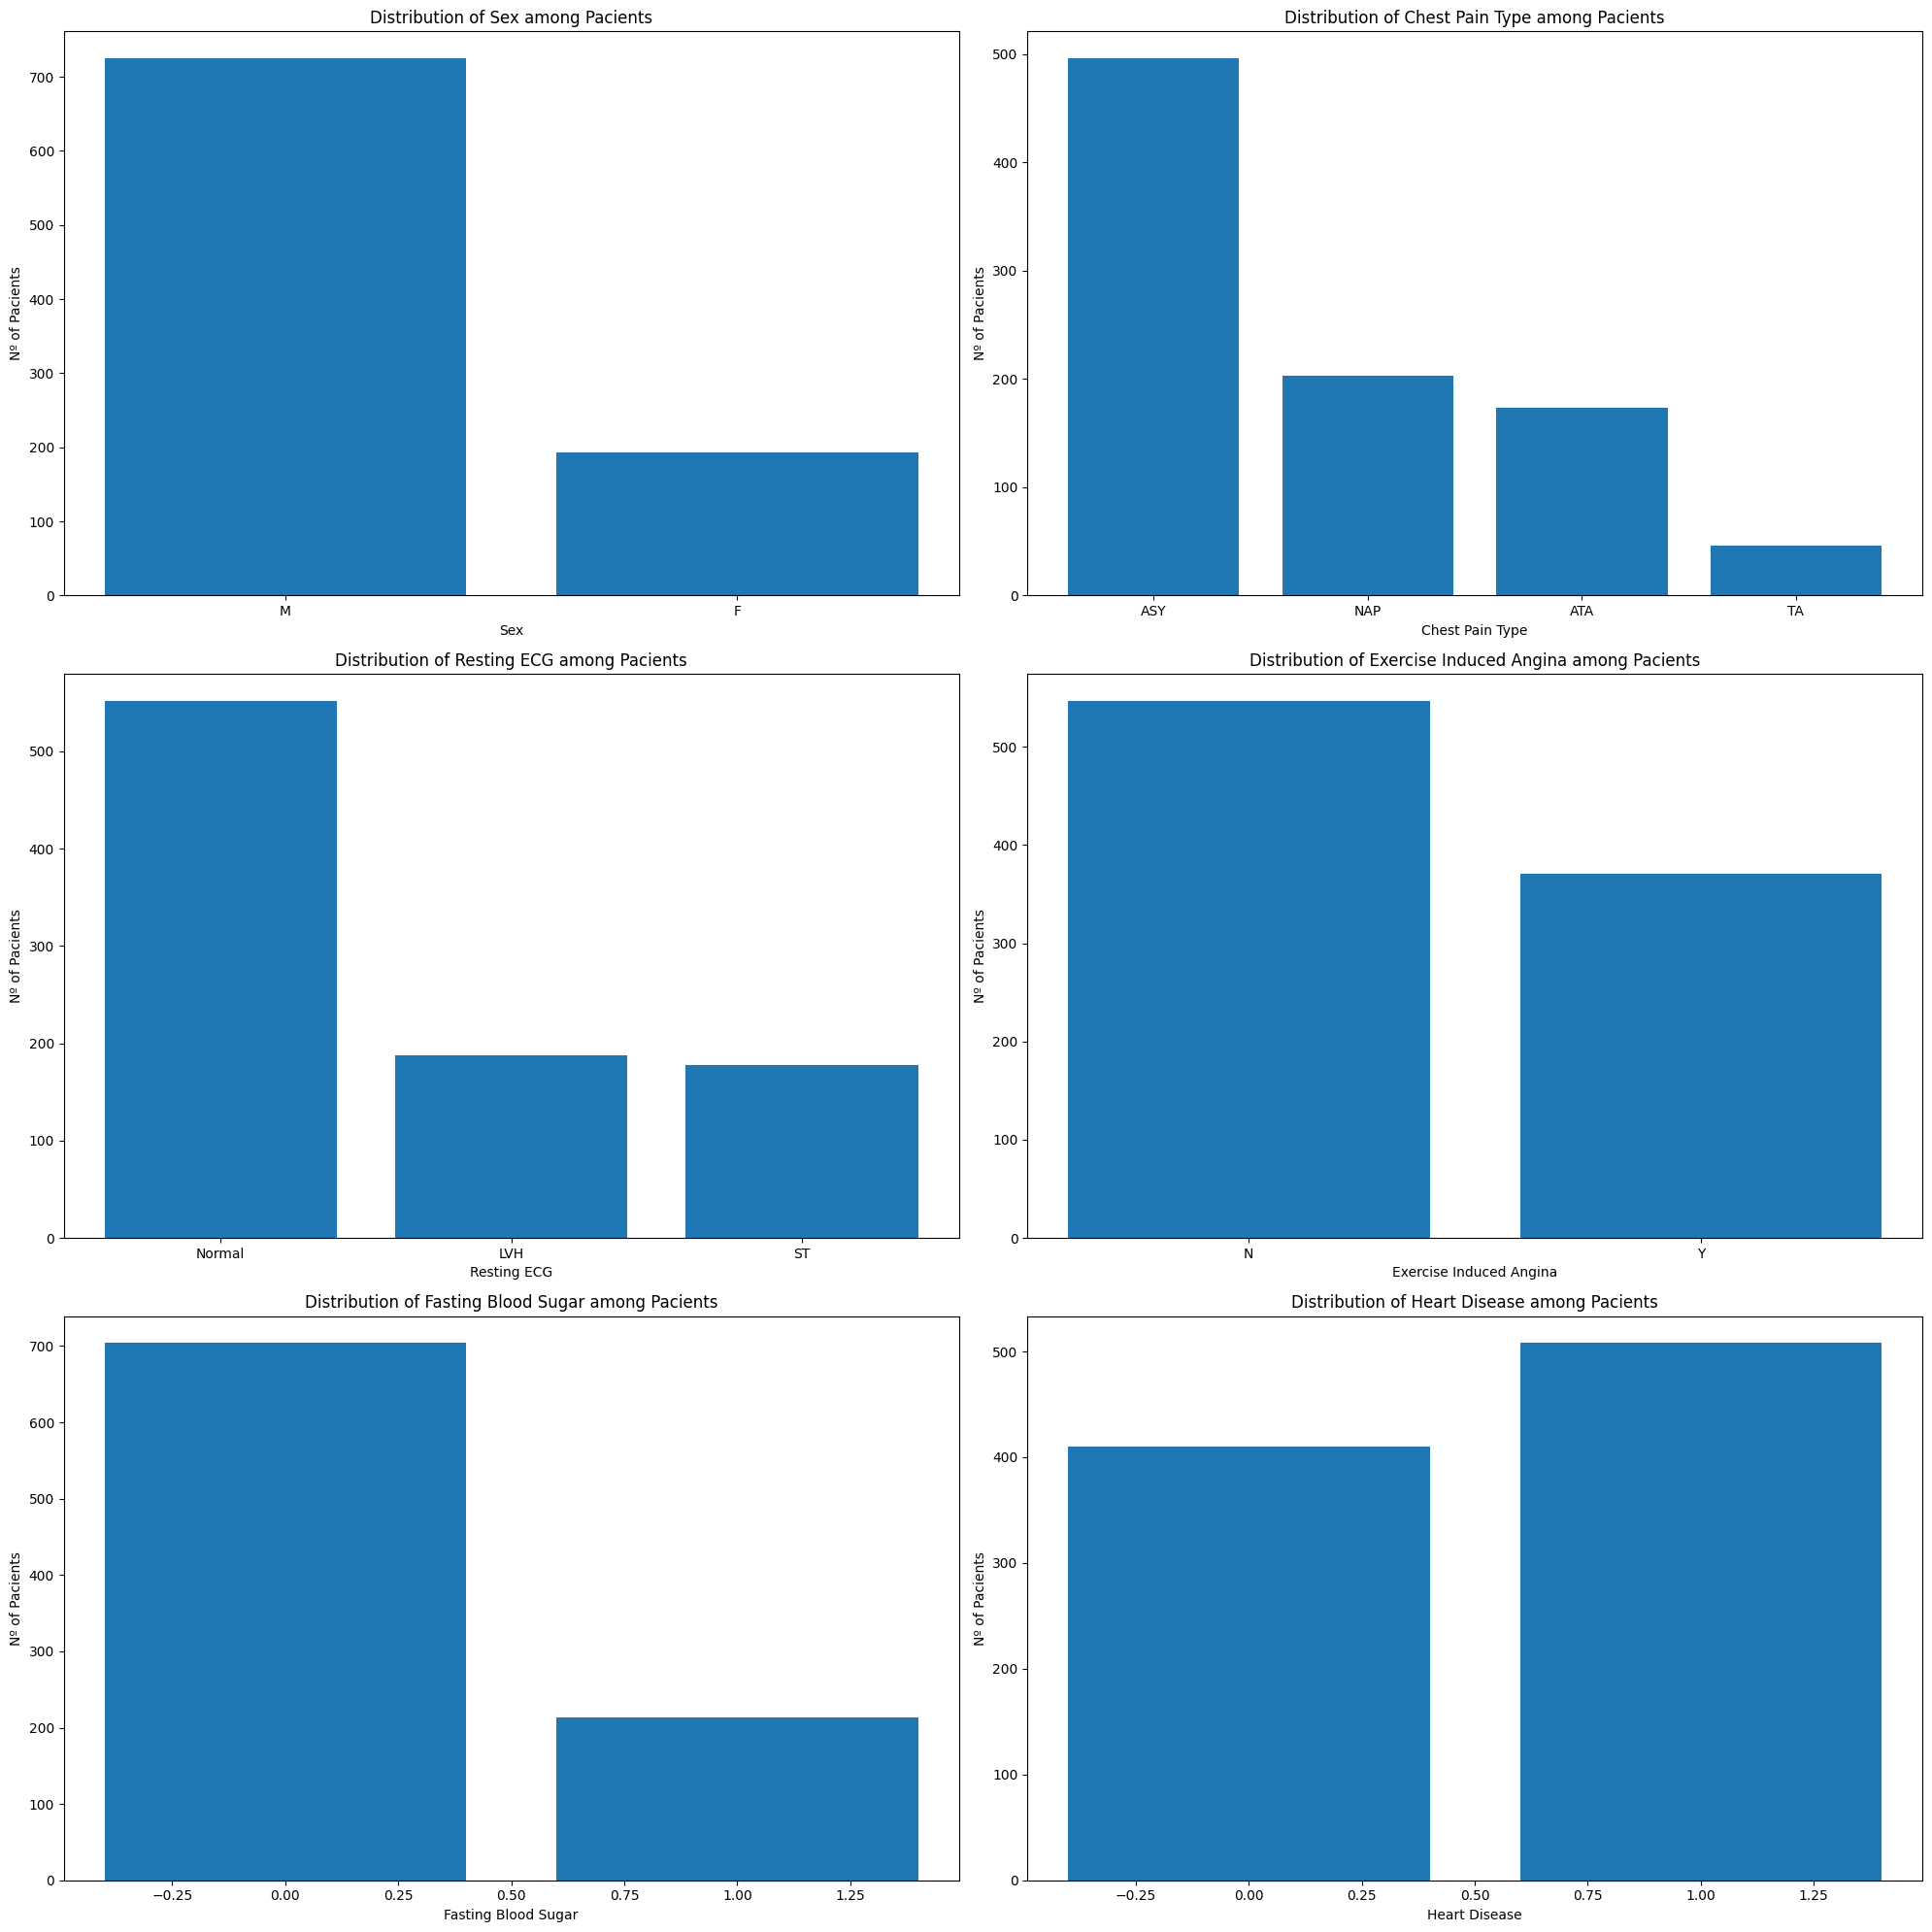

In [6]:
fig, axes = plt.subplots(3, 2, figsize = (20,20))

axes[0,0].bar(hd['Sex'].value_counts().index, hd['Sex'].value_counts())
axes[0,0].set_xlabel('Sex')
axes[0,0].set_ylabel('Nº of Pacients')
axes[0,0].set_title('Distribution of Sex among Pacients')

axes[0,1].bar(hd['ChestPainType'].value_counts().index, hd['ChestPainType'].value_counts())
axes[0,1].set_xlabel('Chest Pain Type')
axes[0,1].set_ylabel('Nº of Pacients')
axes[0,1].set_title('Distribution of Chest Pain Type among Pacients')

axes[1,0].bar(hd['RestingECG'].value_counts().index, hd['RestingECG'].value_counts())
axes[1,0].set_xlabel('Resting ECG')
axes[1,0].set_ylabel('Nº of Pacients')
axes[1,0].set_title('Distribution of Resting ECG among Pacients')

axes[1,1].bar(hd['ExerciseAngina'].value_counts().index, hd['ExerciseAngina'].value_counts())
axes[1,1].set_xlabel('Exercise Induced Angina')
axes[1,1].set_ylabel('Nº of Pacients')
axes[1,1].set_title('Distribution of Exercise Induced Angina among Pacients')

axes[2,0].bar(hd['FastingBS'].value_counts().index, hd['FastingBS'].value_counts())
axes[2,0].set_xlabel('Fasting Blood Sugar')
axes[2,0].set_ylabel('Nº of Pacients')
axes[2,0].set_title('Distribution of Fasting Blood Sugar among Pacients')

axes[2,1].bar(hd['HeartDisease'].value_counts().index, hd['HeartDisease'].value_counts())
axes[2,1].set_xlabel('Heart Disease')
axes[2,1].set_ylabel('Nº of Pacients')
axes[2,1].set_title('Distribution of Heart Disease among Pacients')

plt.tight_layout()

plt.show()

Or in Seaborn:

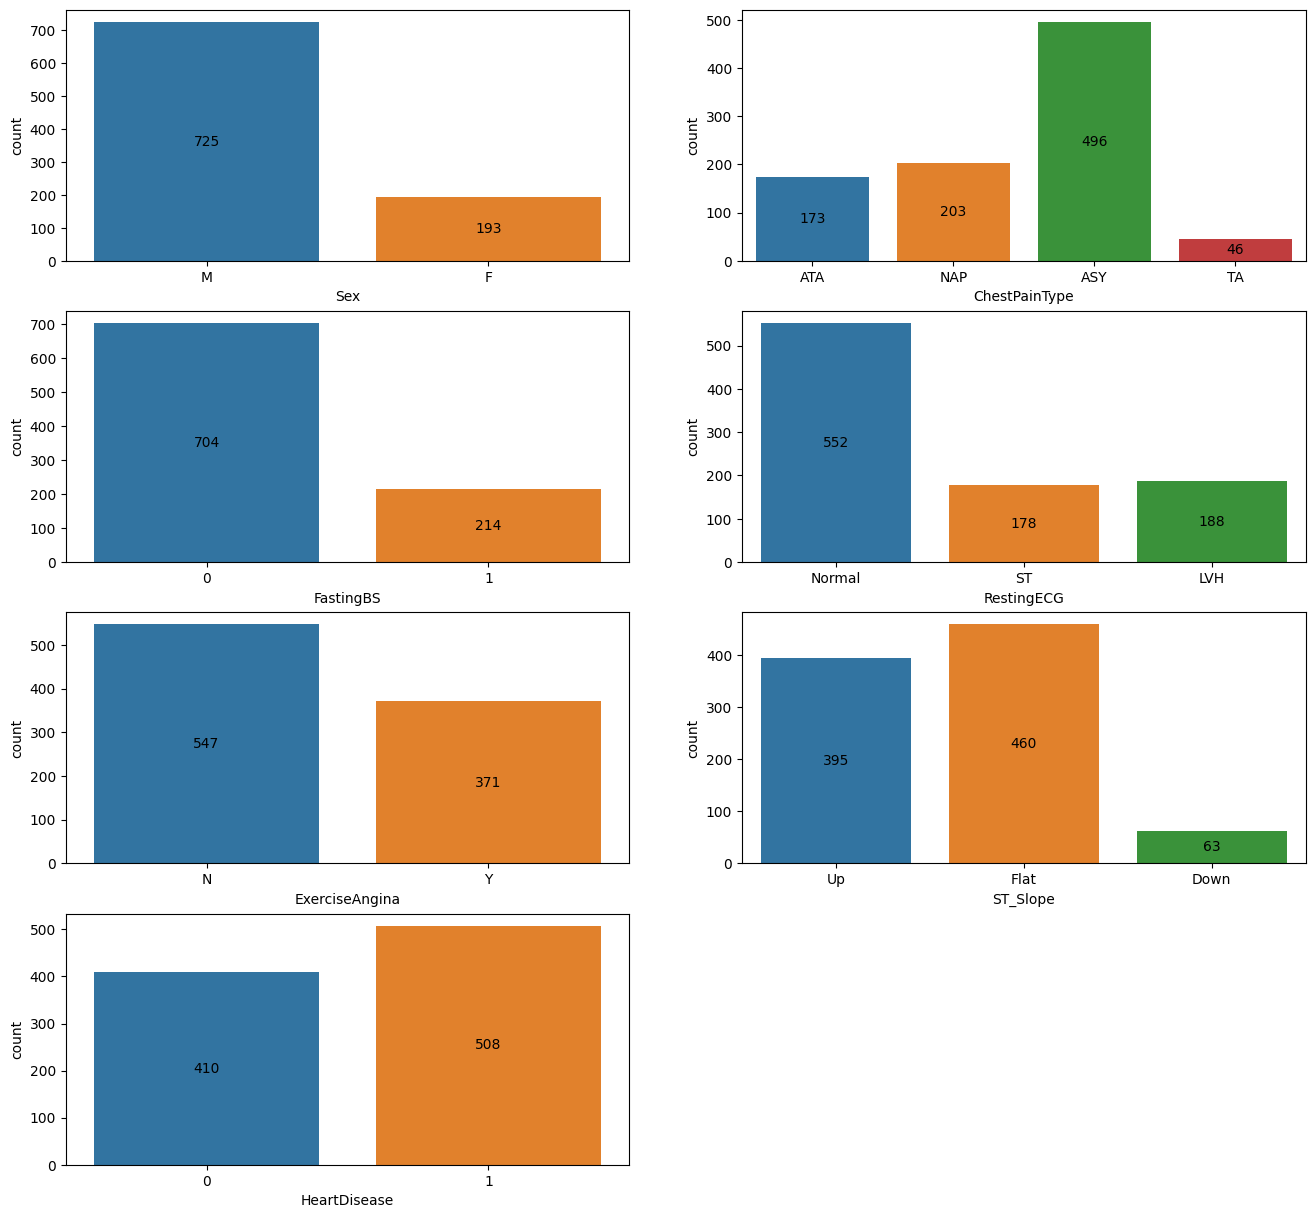

In [7]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=hd[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

* There are much more men then women among pacients
* The majority of patients had ASY (asymptotic) chest pain type.
* The majority of patients had a normal restin ECG.
* The majority of patients had blood sugar lower than 120 mg/dl

Let´s group by HeartDisease

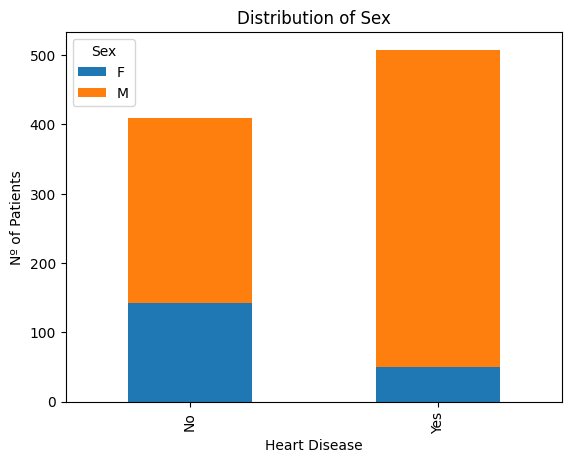

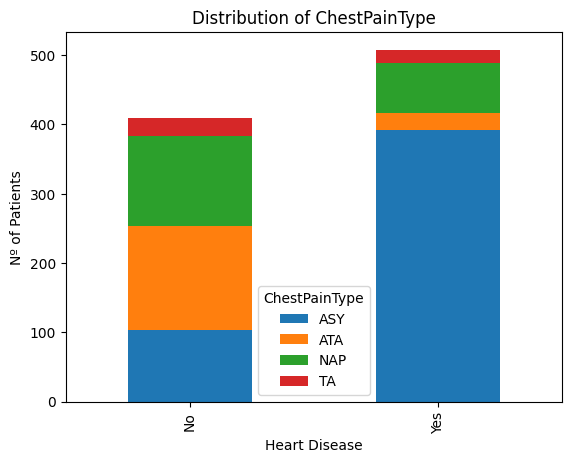

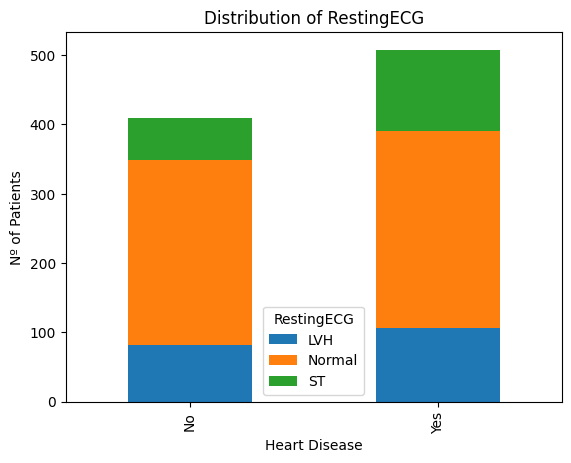

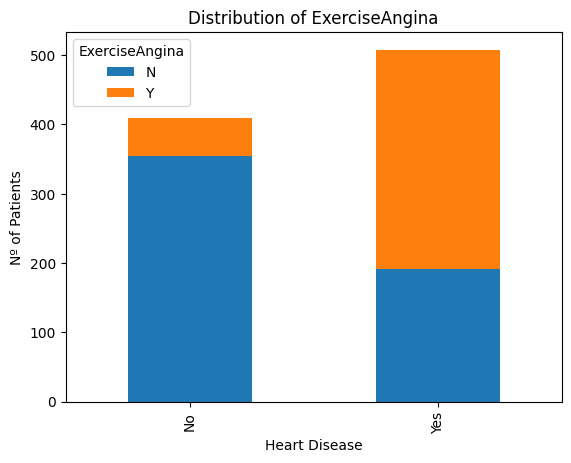

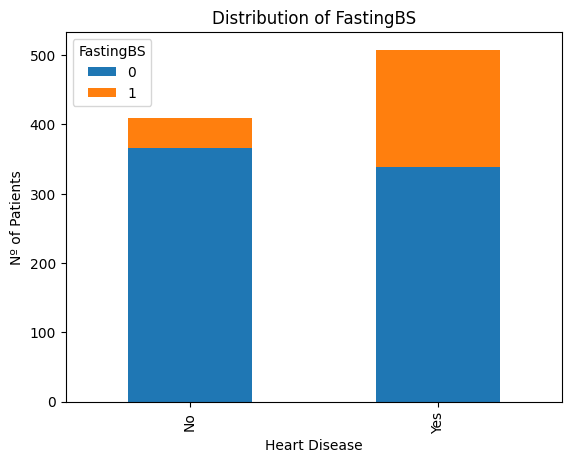

In [8]:
categories = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS']
for cat in categories:
    hd_plot = hd.groupby('HeartDisease')[cat].value_counts().unstack(level=-1)
    hd_plot.index=['No', 'Yes']
    hd_plot.plot.bar(stacked=True)
    plt.xlabel('Heart Disease')
    plt.ylabel('Nº of Patients')
    plt.title('Distribution of {}'.format(cat))
    plt.show()

Or by another way:

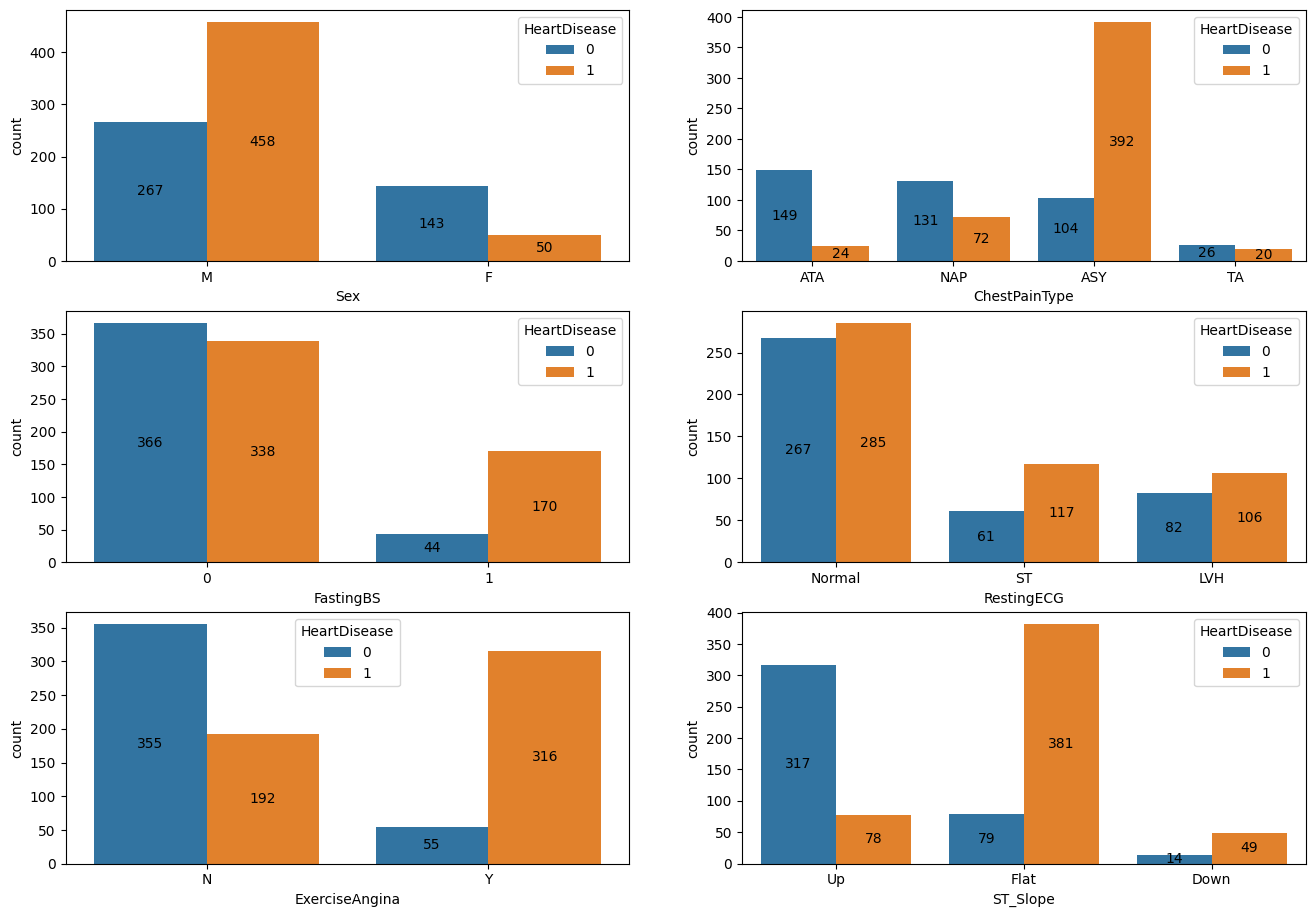

In [9]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=hd[col], hue=hd["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

* Proportion of men is higher among patients with disease.
* More tipical chest pain among patients with disease is ASY.
* ST tipe of Resting ECG is higher for ill patients.
* Level of exercise induced angina is much higher for ill patients.
* Ratio of positive Fasting blood sugar is significantly higher for patients with disease.

# Cleaning the Data

We will deal with absent values (represented by 0)

In [10]:
hd['RestingBP'].value_counts().sort_index().head()

0     1
80    1
92    1
94    2
95    6
Name: RestingBP, dtype: int64

In [11]:
hd['Cholesterol'].value_counts().sort_index().head()

0      172
85       1
100      2
110      1
113      1
Name: Cholesterol, dtype: int64

We will eliminate rows with RestingBP = 0

In [12]:
hd = hd.drop(hd[hd['RestingBP']==0].index)

And we will replace the zero values in Cholesterol in relation to HeartDisease. So, the 0 values in Cholesterol for patients who were diagnosed with a heart disease will be replaced by the median of the non-zero values for patients who were diagnosed with a heart disase. And we'll do the same for those who were not diagnosed with a heart disease.

In [13]:
med_chol_with = round(hd[(hd['HeartDisease']==1) & (hd['Cholesterol']!=0)]['Cholesterol'].median())
med_chol_without = round(hd[(hd['HeartDisease']==0) & (hd['Cholesterol']!=0)]['Cholesterol'].median())
print(med_chol_with)
print(med_chol_without)

246
232


In [14]:
hd['Cholesterol'] = np.where((hd['Cholesterol']==0) & (hd['HeartDisease']==1), med_chol_with, hd['Cholesterol'])
hd['Cholesterol'] = np.where((hd['Cholesterol']==0) & (hd['HeartDisease']==0), med_chol_without, hd['Cholesterol'])
hd['Cholesterol'].value_counts().sort_index().head()

85     1
100    2
110    1
113    1
117    1
Name: Cholesterol, dtype: int64

## Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:
* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS

In [15]:
hd_dummy = pd.get_dummies(data = hd, drop_first=True)
hd_dummy.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [16]:
corr = abs(hd_dummy.corr())

In [17]:
corr['HeartDisease']

Age                  0.282012
RestingBP            0.117990
Cholesterol          0.103581
FastingBS            0.267994
MaxHR                0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ChestPainType_ATA    0.401680
ChestPainType_NAP    0.215311
ChestPainType_TA     0.054591
RestingECG_Normal    0.092452
RestingECG_ST        0.103067
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
ST_Slope_Up          0.621843
Name: HeartDisease, dtype: float64

<Axes: >

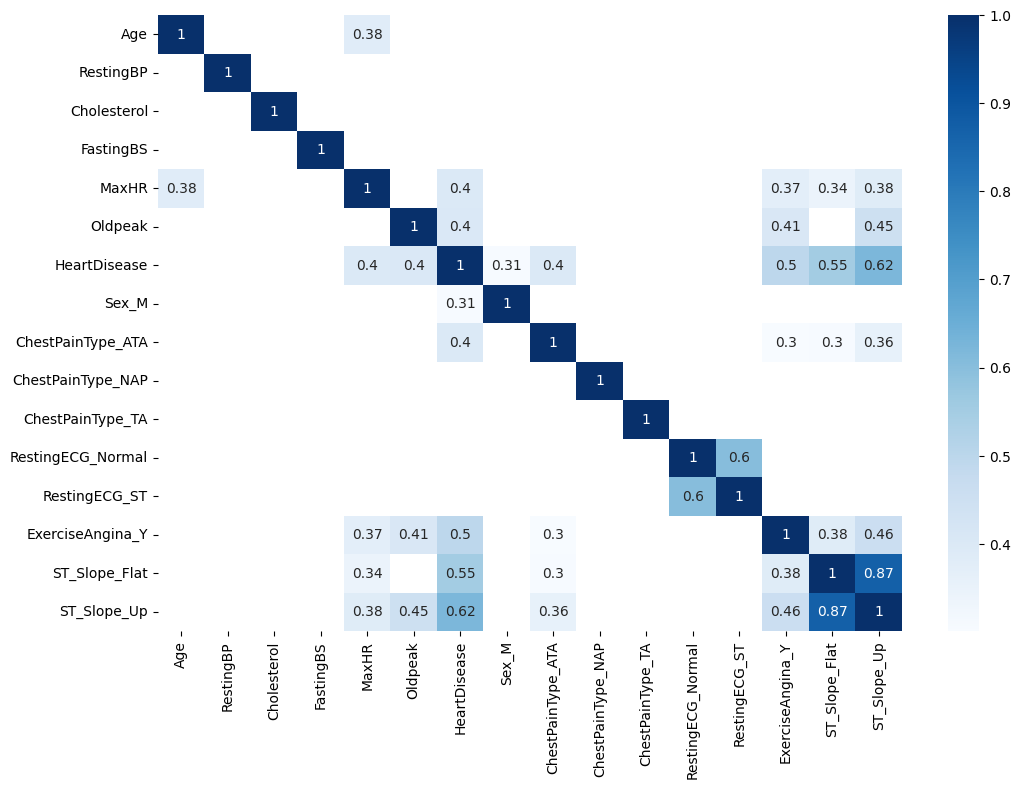

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr > 0.3], annot=True, cmap="Blues")

From our correlation heat map, we can identify the following features to be correlated (correlation coefficient greater than 0.3) to HeartDisease:

* Oldpeak
* MaxHR 
* ChestPainType_ATA
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

In [19]:
features = ['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

## Building a Classifier with One Feature

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X = hd_dummy.drop('HeartDisease', axis=1)
y = hd_dummy['HeartDisease']

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X[features], y, test_size=0.20, random_state = 0)

In [23]:
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(pd.DataFrame(X_train[feature]), y_train)
    score = knn.score(pd.DataFrame(X_val[feature]), y_val)
    print("for feature {}: accuracy = {}".format(feature, score))

for feature Oldpeak: accuracy = 0.6739130434782609
for feature MaxHR: accuracy = 0.6304347826086957
for feature ChestPainType_ATA: accuracy = 0.6847826086956522
for feature Sex_M: accuracy = 0.6739130434782609
for feature ExerciseAngina_Y: accuracy = 0.7119565217391305
for feature ST_Slope_Flat: accuracy = 0.7391304347826086
for feature ST_Slope_Up: accuracy = 0.7717391304347826


Best score is for features ST_Slope_Up, ST_Slope_Flat and ExerciseAngina_Y

## Building a Classifier with Multiple Features

We will use all selected featuers together. But before we will normalize them.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print('Accuracy with all selected features is %.3f'%(accuracy))

Accuracy with all selected features is 0.815


Accuracy has improved when we use all selected features

## Hyperparameter Tuning

We will use GridSearchCV. It creates a validation set as part of its process, so we'll have to update our workflow a bit.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.20, random_state=1)

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
grid_params = {'n_neighbors': [3, 5, 10, 15, 20, 25, 30],
          'weights': ['uniform', 'distance'],
          'p': [1, 2, 3]
         }

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20, 25, 30],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [31]:
accuracy = knn_grid.best_score_*100
best_params = knn_grid.best_params_
print('Accuracy is %.3f'%(accuracy))
print('Best parameters are:', best_params)

Accuracy is 84.176
Best parameters are: {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


Accuracy has improved compared to it´s value before parameters tuning

## Model Evaluation on Test Set

In [32]:
X_test_scaled = scaler.transform(X_test)
accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)*100
print('Accuracy of the test set is %.1f'%(accuracy))

Accuracy of the test set is 87.0


Accuracy has become even higher on the test set.
One explanation of that is the elevated ratio of men in the data. It can create a bias in the model.
If the test dataset doesn't have that many female patients and the model was trained on a dataset with more male patients, then it is understandable it has better accuracy on the test set. Of course, there could be other factors contributing to this discrepancy.

## Summary

Our final model was trained using the following features:

* Oldpeak
* MaxHR 
* ChestPainType_ATA
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

and had a test set accuracy of 88.6%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.

There are quite a few things we could try next to get better results:

* Try out different features.
* Expand the grid search parameters to identify more optimal hyperparameters.
* Explore other algorithms that might perform better than k-NN.
* Try and collect more data.
